## Twitter Sentiment Analysis using Alchemy
Data : https://www.kaggle.com/code/paoloripamonti/twitter-sentiment-analysis/data

In [1]:
import pandas as pd
import numpy as np
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import re

In [2]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [3]:
df = pd.read_csv('./tweets.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


* **0** : **NEGATIVE**
* **2** : **NEUTRAL**
* **4** : **POSITIVE**

In [5]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [6]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

Wall time: 484 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

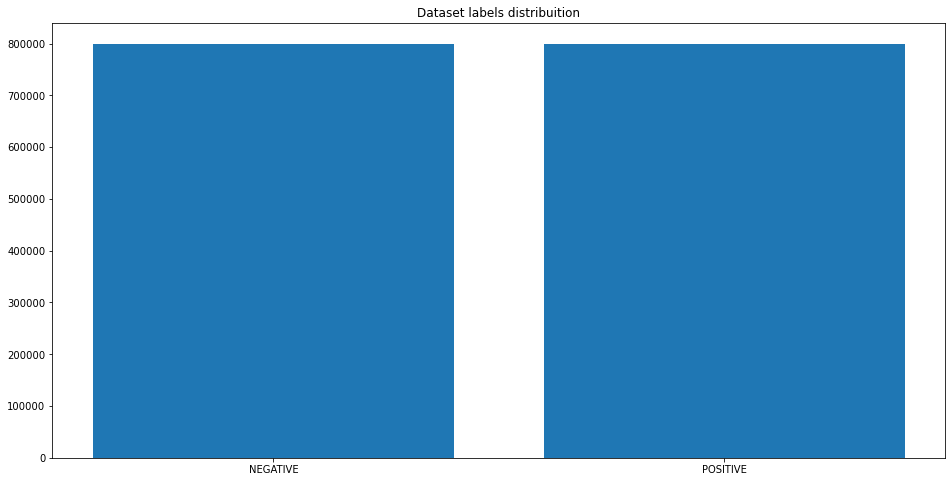

In [7]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [8]:
df.head()

,target,ids,date,flag,user,text
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
nature_goml={}
nature_goml['']=''
nature_goml['a']='fire'
nature_goml['b']='soil'
nature_goml['c']='air'
nature_goml['d']='water'
nature_goml['e']='fire'
nature_goml['f']='soil'
nature_goml['g']='air'
nature_goml['h']='water'
nature_goml['i']='fire'
nature_goml['k']='soil'
nature_goml['l']='air'
nature_goml['m']='water'
nature_goml['n']='fire'
nature_goml['o']='soil'
nature_goml['p']='air'
nature_goml['q']='water'
nature_goml['r']='fire'
nature_goml['s']='soil'
nature_goml['t']='air'
nature_goml['u']='water'
nature_goml['x']='fire'
nature_goml['y']='soil'
nature_goml['z']='air'
nature_goml['j']='water'
nature_goml['v']='fire'
nature_goml['&']='soil'
nature_goml['w']='air'


nature_goml_power={}
nature_goml_power['a']=1
nature_goml_power['b']=1
nature_goml_power['c']=1
nature_goml_power['d']=1
nature_goml_power['e']=1
nature_goml_power['f']=1
nature_goml_power['g']=1
nature_goml_power['h']=1
nature_goml_power['i']=1
nature_goml_power['k']=1
nature_goml_power['l']=1
nature_goml_power['m']=1
nature_goml_power['n']=1
nature_goml_power['o']=1
nature_goml_power['p']=1
nature_goml_power['q']=1
nature_goml_power['r']=1
nature_goml_power['s']=1
nature_goml_power['t']=1
nature_goml_power['u']=1
nature_goml_power['x']=1
nature_goml_power['y']=1
nature_goml_power['z']=1
nature_goml_power['j']=1
nature_goml_power['v']=1
nature_goml_power['&']=1
nature_goml_power['w']=1


nature_goml_gemetria={}
nature_goml_gemetria['a']=1
nature_goml_gemetria['b']=2
nature_goml_gemetria['c']=3
nature_goml_gemetria['d']=4
nature_goml_gemetria['e']=5
nature_goml_gemetria['f']=6
nature_goml_gemetria['g']=7
nature_goml_gemetria['h']=8
nature_goml_gemetria['i']=9
nature_goml_gemetria['k']=10
nature_goml_gemetria['l']=20
nature_goml_gemetria['m']=30
nature_goml_gemetria['n']=40
nature_goml_gemetria['o']=50
nature_goml_gemetria['p']=60
nature_goml_gemetria['q']=70
nature_goml_gemetria['r']=80
nature_goml_gemetria['s']=90
nature_goml_gemetria['t']=100
nature_goml_gemetria['u']=200
nature_goml_gemetria['x']=300
nature_goml_gemetria['y']=400
nature_goml_gemetria['z']=500
nature_goml_gemetria['j']=600
nature_goml_gemetria['v']=700
nature_goml_gemetria['&']=800
nature_goml_gemetria['w']=900





def calcElement(text,nature_goml,nature_goml_power,nature_goml_gemetria):
    TEXT_CLEANING_RE="@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()

    natures={'fire':0,'soil':0,'air':0,'water':0,'gemetria':0}
    for char in text:
        try:
            natures[nature_goml[char]] += nature_goml_power[char]
            natures['gemetria']+=nature_goml_gemetria[char]
        except:
            pass
    return natures


In [10]:
calcElement("loei abdalslam dahy ",nature_goml,nature_goml_power,nature_goml_gemetria)

{'fire': 6, 'soil': 4, 'air': 3, 'water': 4, 'gemetria': 666}

In [11]:
df['fire']=np.nan
df['soil']=np.nan
df['air']=np.nan
df['water']=np.nan
df['gemetria']=np.nan

In [12]:
df.head()

,target,ids,date,flag,user,text,fire,soil,air,water,gemetria
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",NaN,NaN,NaN,NaN,NaN
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,NaN,NaN,NaN,NaN,NaN
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,NaN,NaN,NaN,NaN,NaN
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,NaN,NaN,NaN,NaN,NaN
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",NaN,NaN,NaN,NaN,NaN


In [13]:
df['fire'] = df.text.apply(lambda x: calcElement(x,nature_goml,nature_goml_power,nature_goml_gemetria)['fire'])
df['soil'] = df.text.apply(lambda x: calcElement(x,nature_goml,nature_goml_power,nature_goml_gemetria)['soil'])
df['air'] = df.text.apply(lambda x: calcElement(x,nature_goml,nature_goml_power,nature_goml_gemetria)['air'])
df['water'] = df.text.apply(lambda x: calcElement(x,nature_goml,nature_goml_power,nature_goml_gemetria)['water'])
df['gemetria'] = df.text.apply(lambda x: calcElement(x,nature_goml,nature_goml_power,nature_goml_gemetria)['gemetria'])


In [14]:
df.head()

,target,ids,date,flag,user,text,fire,soil,air,water,gemetria
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",16,12,12,15,6389
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,27,21,23,13,4833
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,22,15,10,11,3999
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,13,12,7,5,2993
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",32,11,13,10,5196


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [16]:
X = df[['fire','soil','air','water','gemetria']]
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


In [18]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [20]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_train)

# Print results: 
print(confusion_matrix(y_train, y_predict))
print(classification_report(y_train, y_predict)) 
print(accuracy_score(y_train, y_predict))


[[450903 189298]
 [195656 444143]]
              precision    recall  f1-score   support

    NEGATIVE       0.70      0.70      0.70    640201
    POSITIVE       0.70      0.69      0.70    639799

    accuracy                           0.70   1280000
   macro avg       0.70      0.70      0.70   1280000
weighted avg       0.70      0.70      0.70   1280000

0.6992546875


In [19]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))


[[84460 75339]
 [76850 83351]]
              precision    recall  f1-score   support

    NEGATIVE       0.52      0.53      0.53    159799
    POSITIVE       0.53      0.52      0.52    160201

    accuracy                           0.52    320000
   macro avg       0.52      0.52      0.52    320000
weighted avg       0.52      0.52      0.52    320000

0.524409375
